In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import time

import spkit as sp
sp.__version__

'0.0.9.4'

## Sinewave with 2 frequencies

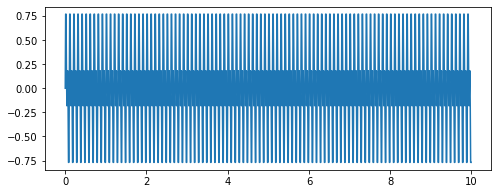

In [2]:
fs=100
t=np.arange(0,10,1/fs)
f0 = 1.5
x  = 0.5*np.sin(2*np.pi*10*t)#*np.exp(t)
x += 0.5*np.sin(2*np.pi*20*t)# + 0.5*np.sin(2*np.pi*40*t)
plt.figure(figsize=(8,3))
plt.plot(t,x)

## Spectrogram

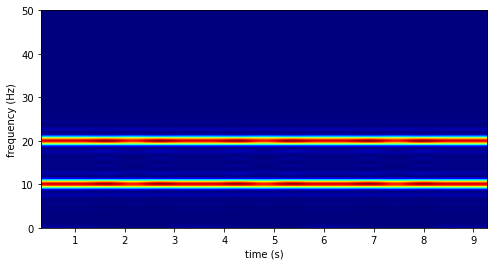

In [5]:
fx,tx,Sx = signal.spectrogram(x,fs=fs,nperseg=64,nfft=256,return_onesided=False)
Sx = np.abs(Sx)
plt.figure(figsize=(8,4))
plt.imshow(Sx[:129], aspect='auto',origin='lower',cmap='jet', extent=[tx[0],tx[-1],0,fs/2])#, interpolation='bicubic')
plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')
plt.show()

## Fractional Fourier Transform

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


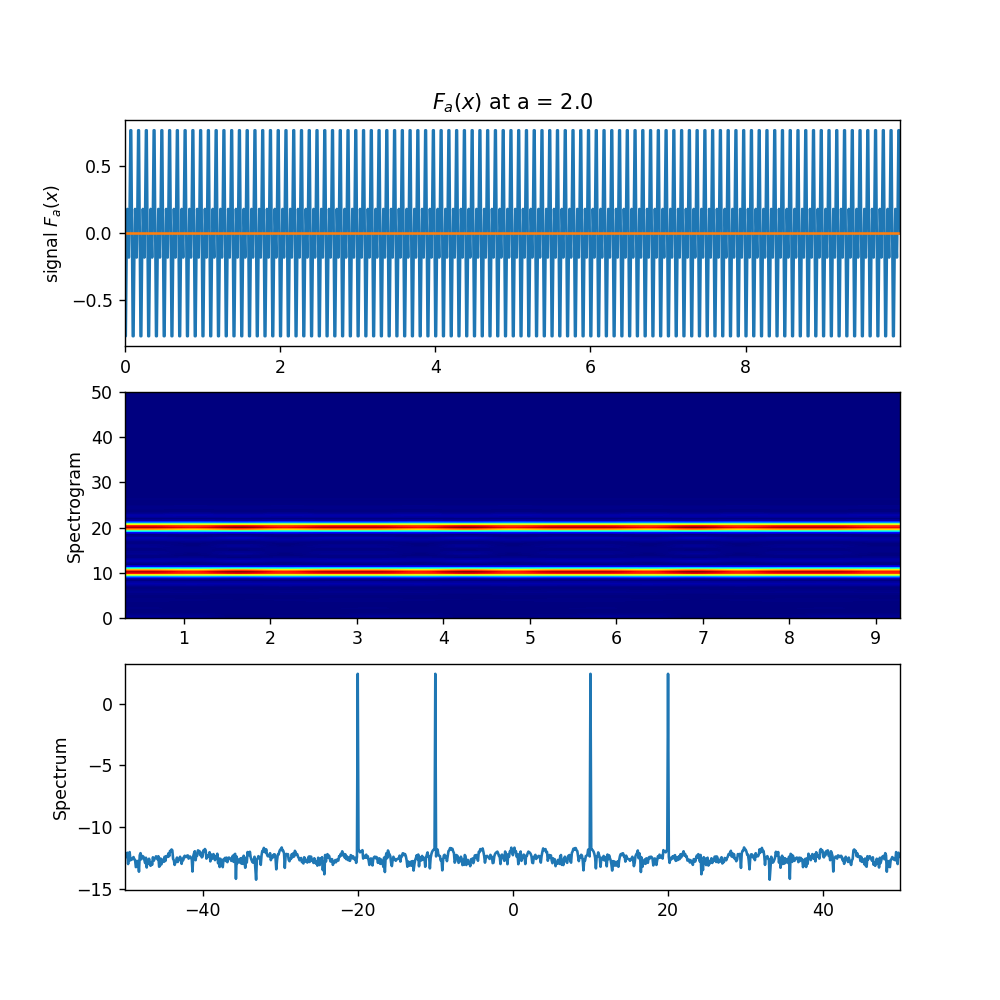

In [7]:
figsize=(8,8)
fig,ax = plt.subplots(3,1,figsize =figsize)
#k=1
for alpha in np.arange(0,2.05,0.05).round(2):
    #Xa = FRFT(x.copy(), alpha)
    Xa = sp.frft(x.copy(),alpha=alpha)
    ax[0].clear()
    #ax[0].plot(t,x)
    ax[0].plot(t,Xa.real)
    ax[0].plot(t,Xa.imag)
    ax[0].set_xlim([t[0],t[-1]])
    ax[0].set_title(r'$F_a(x)$ at a = '+str(alpha))
    ax[0].set_ylabel(r'signal $F_a(x)$')
    
    fx,tx,Sx = signal.spectrogram(Xa,fs=fs,nperseg=64,nfft=256,return_onesided=False)
    Sx = np.abs(Sx)
    #Sx = np.log(np.abs(Sx))
    ax[1].clear()
    ax[1].imshow(Sx[:129], aspect='auto',origin='lower',cmap='jet', extent=[tx[0],tx[-1],0,fs/2])
    ax[1].set_ylabel('Spectrogram')
    #Fx = np.log10(np.abs(np.fft.fftshift(np.fft.fft(x))))
    Ff = np.log10(np.abs(np.fft.fftshift(np.fft.fft(Xa))))
    N = len(Ff)
    fq = fs*(np.arange(N)- (N//2))/N 
    ax[2].clear()
    #ax[2].plot(fq,Fx)
    ax[2].plot(fq,Ff)
    ax[2].set_xlim([fq[0],fq[-1]])
    ax[2].set_ylabel('Spectrum')
    #k+=1
    fig.canvas.draw()
    time.sleep(0.8)